# Lexical encoding: 

In [1]:
amount = "₹50"
print(amount, "Type:", type(amount))

encoded_amount = amount.encode('utf-8')
print('Encoded amount', encoded_amount, " Type of the amount: ", type(encoded_amount))

decoded_amount = encoded_amount.decode('utf-8')
print('Decoded amount', decoded_amount, " Type of the amount: ", type(decoded_amount))

₹50 Type: <class 'str'>
Encoded amount b'\xe2\x82\xb950'  Type of the amount:  <class 'bytes'>
Decoded amount ₹50  Type of the amount:  <class 'str'>


### Regular expressions:

In [2]:
import re
import pandas as pd
import numpy as np

In [3]:
result = re.search('Murali', 'Purse IIIT diplomat Murali')

In [4]:
result

<re.Match object; span=(20, 26), match='Murali'>

In [5]:
result.start()

20

In [6]:
result.end()

26

In [7]:
def find_pattern(text, expression):
    if(re.search(expression, text)):
        return re.search(expression, text)
    return 0

In [8]:
find_pattern('abc', 'ac?')

<re.Match object; span=(0, 1), match='a'>

In [9]:
find_pattern('abc', 'ab?')

<re.Match object; span=(0, 2), match='ab'>

In [10]:
find_pattern('abc', 'ab+')

<re.Match object; span=(0, 2), match='ab'>

In [11]:
find_pattern('abc', 'aba*')

<re.Match object; span=(0, 2), match='ab'>

In [12]:
_str = 'abbccccaaaaaaaaaaaaaaa'

find_pattern(_str, 'abbc{2,7}')

<re.Match object; span=(0, 7), match='abbcccc'>

In [13]:
find_pattern(_str, 'aa{6}')

<re.Match object; span=(7, 14), match='aaaaaaa'>

#### Greedy vs non-greedy approach:

In [14]:
# ===> Greedy
re.search('<.*>', '<HTML><BODY>Hi This is murali</BODY></HTML>')

<re.Match object; span=(0, 43), match='<HTML><BODY>Hi This is murali</BODY></HTML>'>

In [15]:
# ===> NON greedy
re.search('<.*?>', '<HTML><BODY>This is murali</BODY></HTML>')

<re.Match object; span=(0, 6), match='<HTML>'>

#### Substitute: 

In [16]:
string = "Murali Moham"
re.sub('M\w+', '<NameReplace>', string)

'<NameReplace> <NameReplace>'

In [17]:
_str = 'Do not compare apples with oranges. Compare apples with apples'
for t in re.finditer('\w+', _str):
    print(t.start())

0
3
7
15
22
27
36
44
51
56


In [18]:
re.findall('\w*les', _str)

['apples', 'apples', 'apples']

In [19]:
pattern = "(\d{1,2})-(\d{1,2})-(\d{4})"
string = "Today’s date is 18-05-2018."
result = re.search(pattern, string)

In [20]:
result

<re.Match object; span=(16, 26), match='18-05-2018'>

In [21]:
result.group(2)

'05'

In [22]:
t = "user_name_123@gmail.com"
pattern = "@([\w.]+)"
result = re.search(pattern, t)

In [23]:
result.group(1)

'gmail.com'

### Word frequencies and stop words:

In [24]:
import nltk

In [25]:
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import seaborn as sns

In [26]:
url = url = "https://www.gutenberg.org/files/11/11-0.txt"
alice = requests.get(url)
print(alice.text)

ï»¿Project Gutenbergâs Aliceâs Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Aliceâs Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
Last Updated: October 6, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK ALICEâS ADVENTURES IN WONDERLAND ***










ALICEâS ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, âand what is the use o

In [27]:
def plot_word_frequency(words, n_words):
    words = FreqDist(words)
    labels = [element[0] for element in words.most_common(n_words)]
    count = [element[1] for element in words.most_common(n_words)]
    plot = sns.barplot(labels, count)
    return plot

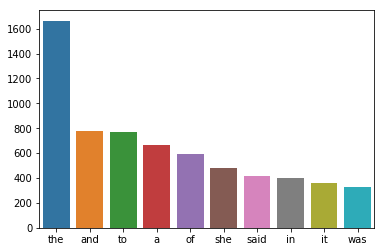

In [28]:
alice_words = alice.text.split()
plot_word_frequency(alice_words, 10)

### Stop words: 

In [29]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
_str = "The greatest aim of education is not knowledge it is aim"
_str.split()
without_stop_words = [word for word in _str.split() if word not in stopwords.words('english')]
without_stop_words

['The', 'greatest', 'aim', 'education', 'knowledge', 'aim']

### Alice wonderland without stop words

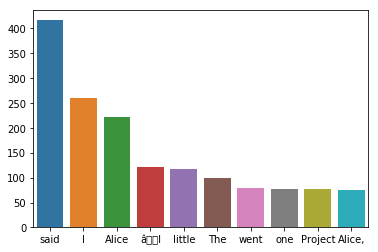

In [32]:
alice_stop_words = [word for word in alice_words if word not in stopwords.words('english')]
plot_word_frequency(alice_stop_words, 10)

In [33]:
FreqDist(alice_stop_words) 

FreqDist({'said': 416, 'I': 260, 'Alice': 221, 'â\x80\x98I': 121, 'little': 117, 'The': 100, 'went': 79, 'one': 78, 'Project': 77, 'Alice,': 76, ...})

### Tokenisation: 

Various tokenisations: 
* Word tokenisation
* Sentence tokenisation
* Tweet tokenisation
* custom tokenisation with regular expressions

##### Word tokenisation: 

In [34]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God."
print(document)

At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God.


In [35]:
from nltk.tokenize import word_tokenize

In [36]:
print(word_tokenize(document))

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself', '.', 'It', 'looks', 'like', 'religious', 'mania', ',', 'and', 'he', "'ll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God', '.']


##### Sentence tokenisation: 

Note: Sentense will be split based on ., ?, !.. etc

In [37]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(document))

["At nine o'clock I visited him myself.", "It looks like religious mania, and he'll soon think that he himself is God."]


##### Tweet tokenisation:

In [38]:
from nltk.tokenize import TweetTokenizer
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
token = TweetTokenizer()
print(token.tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':)', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<3', '.', '#bingewatching', '#nothingtodo', '😎']


##### Custom tokenisation using regexp:

In [39]:
from nltk.tokenize import regexp_tokenize
regexp_tokenize(message, '#[\w]+')

['#bingewatching', '#nothingtodo']

In [40]:
sent = "hellow @murali @123 @mu123"
regexp_tokenize(sent, '@[\w]+')

['@murali', '@123', '@mu123']

### Bag of words model: 

In [41]:
document1 = 'there was a place on my ankle that was itching'
document2 = 'but I did not scratch it'
document3 = 'and then my ear began to itch'
document4 = 'and next my back'

In [42]:
# Creating the Bag of Words model 
word2count = {} 
for data in [document1, document2, document3, document4]: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
word2count

{'there': 1,
 'was': 2,
 'a': 1,
 'place': 1,
 'on': 1,
 'my': 3,
 'ankle': 1,
 'that': 1,
 'itching': 1,
 'but': 1,
 'I': 1,
 'did': 1,
 'not': 1,
 'scratch': 1,
 'it': 1,
 'and': 2,
 'then': 1,
 'ear': 1,
 'began': 1,
 'to': 1,
 'itch': 1,
 'next': 1,
 'back': 1}

In [43]:

import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['my',
 'was',
 'and',
 'there',
 'a',
 'place',
 'on',
 'ankle',
 'that',
 'itching',
 'but',
 'I',
 'did',
 'not',
 'scratch',
 'it',
 'then',
 'ear',
 'began',
 'to',
 'itch',
 'next',
 'back']

In [44]:

X = [] 
for data in [document1, document2, document3, document4]: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 
X

array([[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1]])

In [45]:
np.append([freq_words], [X])

array(['my', 'was', 'and', 'there', 'a', 'place', 'on', 'ankle', 'that',
       'itching', 'but', 'I', 'did', 'not', 'scratch', 'it', 'then',
       'ear', 'began', 'to', 'itch', 'next', 'back', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '1'], dtype='<U21')

In [46]:
X.shape

(4, 23)

In [47]:
freq_words

['my',
 'was',
 'and',
 'there',
 'a',
 'place',
 'on',
 'ankle',
 'that',
 'itching',
 'but',
 'I',
 'did',
 'not',
 'scratch',
 'it',
 'then',
 'ear',
 'began',
 'to',
 'itch',
 'next',
 'back']

====> Bag of words

In [48]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [49]:
def preprocess(document):
    words = word_tokenize(document.lower())
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

documents = [preprocess(document) for document in documents]
documents

['gangs wasseypur great movie .',
 'success movie depends performance actors .',
 'new movies releasing week .']

#### Create bag of words using count vectorization:

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
vector = CountVectorizer()
bag_model = vector.fit_transform(documents)
bag_model

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [52]:
# returns the rown and column number of cells which have 1 as value
print(bag_model)

  (0, 4)	1
  (0, 3)	1
  (0, 10)	1
  (0, 2)	1
  (1, 0)	1
  (1, 7)	1
  (1, 1)	1
  (1, 9)	1
  (1, 4)	1
  (2, 11)	1
  (2, 8)	1
  (2, 5)	1
  (2, 6)	1


In [53]:
# print the full sparse matrix
print(bag_model.toarray())

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [54]:
vector.get_feature_names()

['actors',
 'depends',
 'gangs',
 'great',
 'movie',
 'movies',
 'new',
 'performance',
 'releasing',
 'success',
 'wasseypur',
 'week']

### Spam or Ham

In [55]:
emails = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/a4964625-11c7-4043-adc5-23c0160b2ac1/SMSSpamCollection.txt', sep='\t', names=['label', 'message'])
emails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
messages = [preprocess(message) for message in emails.message]
messages

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...',
 'ok lar ... joking wif u oni ...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's",
 'u dun say early hor ... u c already say ...',
 "nah n't think goes usf , lives around though",
 "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv",
 'even brother like speak . treat like aids patent .',
 "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune",
 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .',
 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030',
 "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cri

In [57]:
vectorizer = CountVectorizer()
bag_of_words_model = vectorizer.fit_transform(messages)
bag_of_words_model

<5572x8655 sparse matrix of type '<class 'numpy.int64'>'
	with 48384 stored elements in Compressed Sparse Row format>

In [58]:
vectorizer.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [59]:
pd.DataFrame(bag_of_words_model.toarray(), columns = vectorizer.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#===> Spam nd ham top 100
top_100_messages= emails.head(100)
top_100_messages.shape

(100, 2)

In [61]:
top_100_messages.message

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
15    XXXMobileMovieClub: To use your credit, click ...
16                           Oh k...i'm watching here:)
17    Eh u remember how 2 spell his name... Yes 

In [62]:
top_100_messages = [preprocess(message) for message in top_100_messages.message]
top_100_messages

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...',
 'ok lar ... joking wif u oni ...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's",
 'u dun say early hor ... u c already say ...',
 "nah n't think goes usf , lives around though",
 "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv",
 'even brother like speak . treat like aids patent .',
 "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune callers . press *9 copy friends callertune",
 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hours .',
 'mobile 11 months ? u r entitled update latest colour mobiles camera free ! call mobile update co free 08002986030',
 "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cri

In [63]:
vectorizer = CountVectorizer()
bag_model = vectorizer.fit_transform(top_100_messages)
bag_model

<100x640 sparse matrix of type '<class 'numpy.int64'>'
	with 884 stored elements in Compressed Sparse Row format>

In [64]:
bag_model.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
result = pd.DataFrame(bag_model.toarray(), columns=vectorizer.get_feature_names())

In [66]:
result.shape

(100, 640)

In [67]:
result.sum().sum()

934

### Stemming: 

In [68]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

In [69]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [70]:
words = word_tokenize(text.lower())
words = [word for word in words if word not in stopwords.words('english')]

In [71]:
porter = PorterStemmer()
porter_stems = [porter.stem(word) for word in words]

In [72]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [73]:
snow_stemmer = SnowballStemmer('english')
snow_stems = [snow_stemmer.stem(word) for word in words]

In [74]:
stems = pd.DataFrame({'tokens': words, 'porter_stems': porter_stems, 'snow_stems': snow_stems})
stems.head()

,tokens,porter_stems,snow_stems
0,orderly,orderli,order
1,methodical,method,method
2,looked,look,look
3,",",",",","
4,hand,hand,hand


In [75]:
stems[(stems.tokens != stems.porter_stems) | (stems.tokens != snow_stems)]

,tokens,porter_stems,snow_stems
0,orderly,orderli,order
1,methodical,method,method
2,looked,look,look
9,ticking,tick,tick
10,sonorous,sonor,sonor
12,flapped,flap,flap
13,newly,newli,newli
18,pitted,pit,pit
19,gravity,graviti,graviti
20,longevity,longev,longev


#### Lemmitization: 

In [76]:
from nltk.stem.wordnet import WordNetLemmatizer

In [77]:
help(WordNetLemmatizer)

Help on class WordNetLemmatizer in module nltk.stem.wordnet:

class WordNetLemmatizer(builtins.object)
 |  WordNet Lemmatizer
 |  
 |  Lemmatize using WordNet's built-in morphy function.
 |  Returns the input word unchanged if it cannot be found in WordNet.
 |  
 |      >>> from nltk.stem import WordNetLemmatizer
 |      >>> wnl = WordNetLemmatizer()
 |      >>> print(wnl.lemmatize('dogs'))
 |      dog
 |      >>> print(wnl.lemmatize('churches'))
 |      church
 |      >>> print(wnl.lemmatize('aardwolves'))
 |      aardwolf
 |      >>> print(wnl.lemmatize('abaci'))
 |      abacus
 |      >>> print(wnl.lemmatize('hardrock'))
 |      hardrock
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __unicode__ = __str__(self, /)
 |  
 |  lemmatize(self, word, pos='n')
 |  
 |  unicode_repr = __repr__(self)
 |  
 |  ----------------------------------------------

In [78]:
lemmatizer = WordNetLemmatizer()
%time
lemmitized_words = [lemmatizer.lemmatize(word) for word in words]

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 10 µs


In [79]:
stems['lemmitized_words'] = lemmitized_words

In [80]:
stems[(stems.tokens != stems.porter_stems) | (stems.tokens != stems.snow_stems) | (stems.tokens != stems.lemmitized_words)]

,tokens,porter_stems,snow_stems,lemmitized_words
0,orderly,orderli,order,orderly
1,methodical,method,method,methodical
2,looked,look,look,looked
9,ticking,tick,tick,ticking
10,sonorous,sonor,sonor,sonorous
12,flapped,flap,flap,flapped
13,newly,newli,newli,newly
18,pitted,pit,pit,pitted
19,gravity,graviti,graviti,gravity
20,longevity,longev,longev,longevity


In [81]:
alice_word_lemmitze = pd.DataFrame({'alice_word': alice_words, 'lemmitizer': [lemmatizer.lemmatize(word) for word in alice_words]})
alice_word_lemmitze[alice_word_lemmitze.alice_word !=  alice_word_lemmitze.lemmitizer].head(10)

,alice_word,lemmitizer
25,restrictions,restriction
39,terms,term
112,was,wa
143,was,wa
149,pictures,picture
151,conversations,conversation
165,pictures,picture
170,was,wa
178,as,a
218,eyes,eye


#### Lemmitization/Stemming for full messages:

In [82]:
def pre_processing(sentense, stemming=True):
    words = word_tokenize(sentense.lower())
    words = [word for word in words if word not in stopwords.words('english')]
    if (stemming):
        words = [porter.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(words)
        

In [83]:
messages = [pre_processing(message, True) for message in emails.head(50).message]
vector = CountVectorizer()
bag_of_words_mod = vector.fit_transform(messages)

In [84]:
bag_of_words_mod.shape

(50, 359)

In [85]:
bag_of_words = pd.DataFrame(bag_of_words_mod.toarray(), columns=vector.get_feature_names())
bag_of_words.head()

,000,07732584351,08000930705,08002986030,08452810075over18,09061701461,100,11,12,150p,...,worri,www,xuhui,xxx,xxxmobilemovieclub,ye,yeah,yummi,yup,ú1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
bag_of_words.shape

(50, 359)

In [87]:
stemming_features = vectorizer.get_feature_names()

#### Lemmitization: 

In [88]:
messages = [pre_processing(message, stemming=False) for message in emails.head(50).message]
vector = CountVectorizer()
lemmitization_bag = vector.fit_transform(messages)

In [89]:
lemmitization_bag.shape

(50, 373)

In [90]:
lem_features = vector.get_feature_names()

In [91]:
print(lem_features)

['000', '07732584351', '08000930705', '08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150p', '16', '20', '2005', '21st', '2nd', '4403ldnw1a7rw18', '4txt', '50', '6days', '81010', '87077', '87121', '87575', '8am', '900', 'abiola', 'actin', 'aft', 'ahead', 'ahhh', 'aid', 'already', 'alright', 'always', 'amore', 'amp', 'anymore', 'anything', 'apologetic', 'apply', 'arabian', 'ard', 'around', 'ask', 'available', 'back', 'badly', 'bit', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'burn', 'bus', 'ca', 'call', 'caller', 'callertune', 'calls', 'camcorder', 'camera', 'car', 'cash', 'catch', 'caught', 'chance', 'charged', 'cheer', 'chgs', 'child', 'cine', 'claim', 'clear', 'click', 'co', 'code', 'colour', 'com', 'comin', 'comp', 'confirm', 'convincing', 'copy', 'cost', 'could', 'crave', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'cuppa', 'customer', 'da', 'darling', 'date', 'day', 'dbuk', 'decide', 'decided', 'delivery', 'dinner', 'done', 'dont', 'dun', 'early',

Steps for text preprocessing:
* split sentence into words
* apply lower case
* Remove stop words
* apply tokenisation
    * Word tokenisation
    * sentense tokenisation
    * Tweet tokenisation
    * Regex tokenisation
* Stemming 
* Lemmatization
* apply bag of words

#### TF-IDF (term frequency/inverse document frequency)

In [92]:
document2 = "The beer at Vapour, Bangalore was amazing. My favourites are the wheat beer and the ale beer."
_words = word_tokenize(document2.lower())
result = [word for word in _words if word not in stopwords.words('english')]
result

['beer',
 'vapour',
 ',',
 'bangalore',
 'amazing',
 '.',
 'favourites',
 'wheat',
 'beer',
 'ale',
 'beer',
 '.']

In [93]:
import math
round((2/9) * (math.log10(3/1)), 3)

0.106

In [94]:
# ===> Vapour tf-idf
round((1/9) * (math.log10(3/1)), 3)

0.053

In [95]:
# ===> TF IDF for spam/ham email: 

from sklearn.feature_extraction.text import TfidfVectorizer
messages = [pre_processing(message, True) for message in emails.head(50).message]
tf_idf_vector = TfidfVectorizer()
tf_bag_of_words_mod = tf_idf_vector.fit_transform(messages)

In [96]:
re = pd.DataFrame(tf_bag_of_words_mod.toarray(), columns=tf_idf_vector.get_feature_names()) 

In [97]:
re.iloc[9, :]['08452810075over18']

0.0

In [101]:
processed_messages = [pre_processing(message, stemming=False) for message in emails.message]
processed_messages

['go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...',
 'ok lar ... joking wif u oni ...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's",
 'u dun say early hor ... u c already say ...',
 "nah n't think go usf , life around though",
 "freemsg hey darling 's 3 week 's word back ! 'd like fun still ? tb ok ! xxx std chgs send , £1.50 rcv",
 'even brother like speak . treat like aid patent .',
 "per request 'melle melle ( oru minnaminunginte nurungu vettam ) ' set callertune caller . press *9 copy friend callertune",
 'winner ! ! valued network customer selected receivea £900 prize reward ! claim call 09061701461. claim code kl341 . valid 12 hour .',
 'mobile 11 month ? u r entitled update latest colour mobile camera free ! call mobile update co free 08002986030',
 "'m gon na home soon n't want talk stuff anymore tonight , k ? 've cried enough

In [104]:
words = ['i', 'was', 'has', 'Yes']
[word for word in words if word not in stopwords.words('english')]

['Yes']

### Phonetic hashing: 

In [10]:
def get_soundex(token):
    token = token.upper()
    soundex = ''
    soundex += token[0]
    dictonary = {'B': "1", 'F': "1", 'P': "1", 'V': "1", 'C': "2", 'G': "2", 'J': "2", 'K': "2", 'Q': "2", 'S': "2", 'X': "2", 'Z': "2", 'D': "3", 'T': "3", "L": "4", "M": "5", "N": "5", "R": "6", 'A': '', 'E': '', 'I': '', 'O': '', 'U': '', 'H': '', 'W': '', 'Y': ''}
    for char in token[1:]:
        code = dictonary[char]
        if code != soundex[-1]:
            soundex += code
    return soundex[:4].ljust(4, "0")

In [11]:
get_soundex('Bengaluru')

'B524'

### Edit distance: 

In [2]:
from nltk.metrics.distance import edit_distance

In [13]:
edit_distance('apple', 'appel', transpositions=False)

2

In [15]:
# swap the characters if both side by side can be swapped.
edit_distance('apple', 'appel', transpositions=True)

1

In [16]:
edit_distance('Damerau', 'Levenshtein')

10

In [3]:
edit_distance('perspective', 'prospective')

2